# Using InceptionV3 Model

In [ ]:
!pip install torch
!pip install torchvision
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
#Imports

import torch
import torch.nn as nn
from torchvision import models, transforms, datasets
from torch.utils.data import DataLoader
import os
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#paths

data_dir = '/content/drive/MyDrive/Variant-a(Multiclass Classification)'
train_dir = '/content/drive/MyDrive/Variant-a(Multiclass Classification)/train'
val_dir = '/content/drive/MyDrive/Variant-a(Multiclass Classification)/val'
test_dir = '/content/drive/MyDrive/Variant-a(Multiclass Classification)/test'
num_classes = len(os.listdir(train_dir))

In [ ]:
#transforms

transform = {
    "train": transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ]),
    "val": transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)
    ]),
    "test" : transforms.Compose([
        transforms.Resize((299, 299)),
        transforms.ToTensor(),
        transforms.Normalize([0.5]*3, [0.5]*3)])
}

In [ ]:
train_dataset = datasets.ImageFolder(train_dir, transform=transform["train"])
val_dataset = datasets.ImageFolder(val_dir, transform=transform["val"])
test_dataset = datasets.ImageFolder(test_dir, transform=transform["test"])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.inception_v3(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, num_classes)
model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, num_classes)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 151MB/s]


In [ ]:
#conditions for training

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
#Training loop

num_epochs = 3
for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  correct = 0
  total = 0

  for images, labels in train_loader:
    optimizer.zero_grad()
    outputs, aux_outputs = model(images)
    loss1 = criterion(outputs, labels)
    loss2 = criterion(aux_outputs, labels)
    loss = loss1 + 0.4*loss2
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

  accuracy = 100*correct/total
  print(f"Epoch[{epoch+1}/{num_epochs}], Loss: {running_loss:0.4f}, Accuracy: {accuracy:0.2f}%")


torch.save(model.state_dict(), "inceptionv3_tomato.pth")

Epoch[1/3], Loss: 135.4935, Accuracy: 66.89%
Epoch[2/3], Loss: 44.9522, Accuracy: 89.41%
Epoch[3/3], Loss: 22.1511, Accuracy: 95.22%


In [ ]:
# Load the saved model weights
model.load_state_dict(torch.load("inceptionv3_tomato.pth"))
model.eval()

correct, total = 0, 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 88.50%


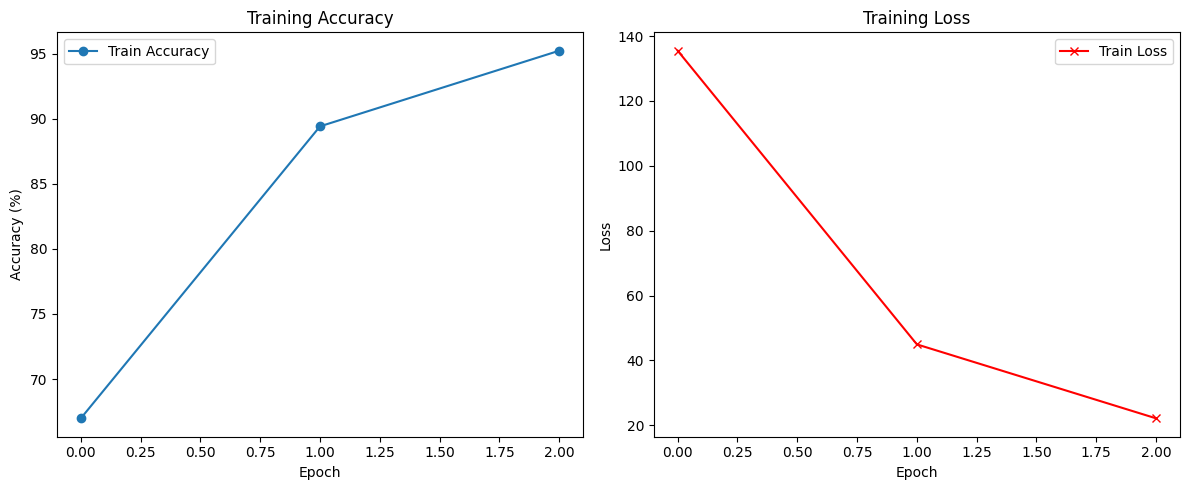

In [ ]:
# Plotting accuracy and loss

# Sample data — replace with your actual validation metrics
train_accuracies = [66.98, 89.41, 95.22]
train_losses = [135.4935, 44.9522, 22.1511]
val_accuracies = [70.12, 85.67, 91.45]
val_losses = [120.45, 55.32, 30.78]

plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(val_accuracies, label='Validation Accuracy', marker='s')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.legend()
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Train Loss', marker='x', color='red')
plt.plot(val_losses, label='Validation Loss', marker='^', color='orange')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


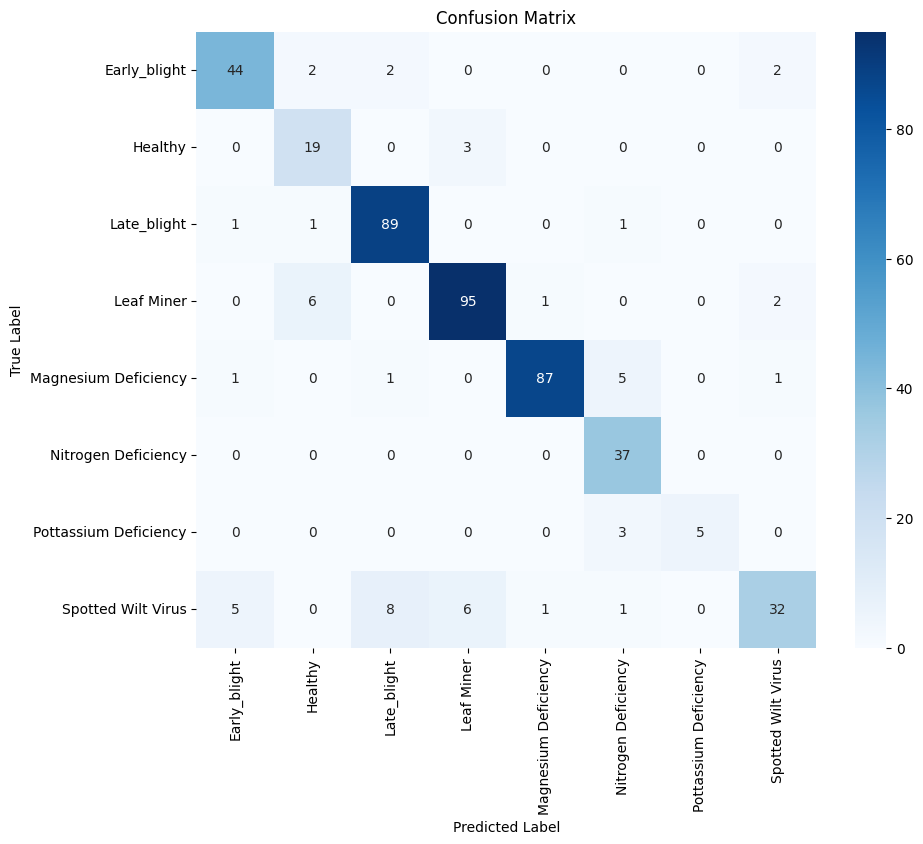


Classification Report:
                       precision    recall  f1-score   support

         Early_blight       0.86      0.88      0.87        50
              Healthy       0.68      0.86      0.76        22
          Late_blight       0.89      0.97      0.93        92
           Leaf Miner       0.91      0.91      0.91       104
 Magnesium Deficiency       0.98      0.92      0.95        95
  Nitrogen Deficiency       0.79      1.00      0.88        37
Pottassium Deficiency       1.00      0.62      0.77         8
   Spotted Wilt Virus       0.86      0.60      0.71        53

             accuracy                           0.89       461
            macro avg       0.87      0.85      0.85       461
         weighted avg       0.89      0.89      0.88       461



In [ ]:
# Confusion Matrix + Classification Report

# Collect predictions and true labels
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
class_names = test_dataset.classes

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds, target_names=class_names))